In [45]:
%matplotlib inline

In [46]:
#Dependcies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [47]:
# Reference file path
csv_path = "Output/clean_data.csv"

# Read the CSV into a Pandas DataFrame
homicide_reports_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
homicide_reports_df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,402433,Anchorage,Alaska,2000,January,1,Murder or Manslaughter,Yes,Female,25,Black,Male,28,Black,Romantic,Handgun
1,402434,Anchorage,Alaska,2000,January,2,Murder or Manslaughter,Yes,Female,31,White,Male,18,Native American/Alaska Native,Unknown,Handgun
2,402435,Anchorage,Alaska,2000,January,3,Manslaughter by Negligence,Yes,Male,1,Asian/Pacific Islander,Male,12,Asian/Pacific Islander,Family,Blunt Object
3,402436,Anchorage,Alaska,2000,February,1,Manslaughter by Negligence,Yes,Male,0,Asian/Pacific Islander,Female,39,Asian/Pacific Islander,Friend,Blunt Object
4,402437,Anchorage,Alaska,2000,March,1,Murder or Manslaughter,No,Female,29,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Knife


In [48]:
# Display a statistical overview
homicide_reports_df.describe()

,Record ID,Year,Incident,Victim Age
count,236022.000000,236022.000000,236022.000000,236022.000000
mean,520443.500000,2006.869779,40.083814,35.444031
std,68133.826955,4.235754,146.072384,46.585557
min,402433.000000,2000.000000,0.000000,0.000000
25%,461438.250000,2003.000000,1.000000,22.000000
50%,520443.500000,2007.000000,2.000000,30.000000
75%,579448.750000,2010.000000,8.000000,43.000000
max,638454.000000,2014.000000,999.000000,998.000000


In [49]:
# Figure out the minimum and maximum 
print(homicide_reports_df["Victim Age"].sum())
print(homicide_reports_df["Incident"].sum())

8365571
9460662


In [50]:
print(homicide_reports_df["Weapon"].value_counts())

Handgun          116205
Knife             29118
Firearm           28077
Blunt Object      23945
Unknown           16190
Shotgun            7186
Rifle              6874
Strangulation      1905
Fire               1776
Suffocation        1638
Gun                1495
Drugs               981
Drowning            319
Poison              184
Explosives           82
Fall                 47
Name: Weapon, dtype: int64


# Bubble Plot for Total Homicide Reports

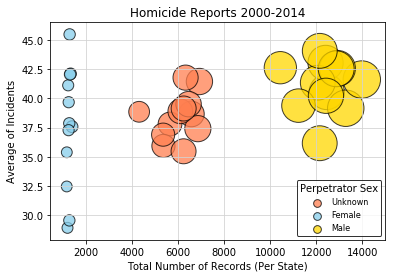

In [69]:
# Obtain the x and y coordinates for Perpetrator Sex
Unknown_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Unknown"].groupby([homicide_reports_df["Month"]])
Female_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Female"].groupby([homicide_reports_df["Month"]])
Male_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Male"].groupby([homicide_reports_df["Month"]])

xaxis_unknown = Unknown_Perp["Record ID"].count()
yaxis_unknown = Unknown_Perp["Incident"].mean()


xaxis_female = Female_Perp["Record ID"].count()
yaxis_female = Female_Perp["Incident"].mean()


xaxis_male = Male_Perp["Record ID"].count()
yaxis_male = Male_Perp["Incident"].mean()


# Build the scatter plots for each Sex types
plt.scatter(xaxis_unknown, yaxis_unknown, label = "Unknown", s=xaxis_unknown, marker="o", facecolors=["coral"], edgecolors="black", alpha = 0.75)
plt.scatter(xaxis_female, yaxis_female, label = "Female",s=xaxis_female, marker="o", facecolors=["skyblue"], edgecolors="black", alpha = 0.75)
plt.scatter(xaxis_male, yaxis_male, label = "Male", s=xaxis_male, marker="o", facecolors=["gold"], edgecolors="black", alpha = 0.75)


# Incorporate the other graph properties
plt.title("Homicide Reports 2000-2014")
plt.xlabel("Total Number of Records (Per State)")
plt.ylabel("Average of Incidents")

# Create a legend
legend = plt.legend(frameon = True, edgecolor = 'black', fontsize = 8, title= "Perpetrator Sex", loc="best")

# Adjust the legend 
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

#Incorporate a text label regarding circle size
#plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
plt.grid(c="lightgrey")  

# Save Figure
#plt.savefig("../Images/Ride Sharing.png", bbox_inches="tight")

# Show plot
plt.show()